# Sample plots in matplotlib

## Simple Line Plot

<IPython.core.display.Javascript object>


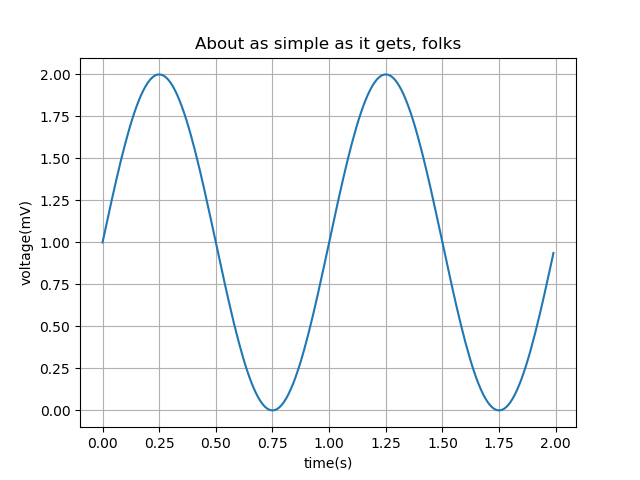

In [92]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time(s)', ylabel='voltage(mV)', title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

## Multiple subplots in one figure

<IPython.core.display.Javascript object>


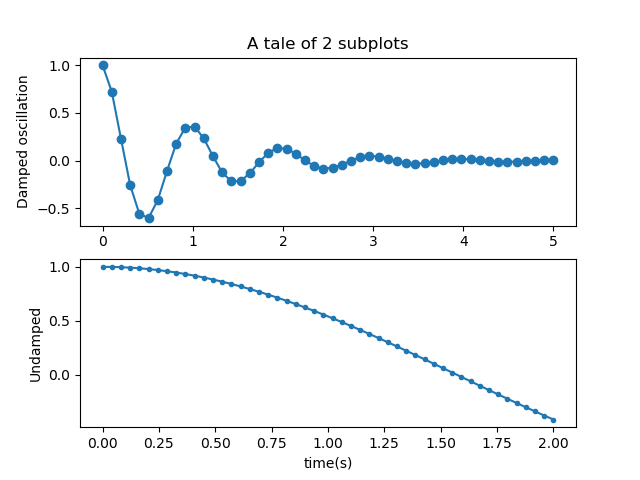

In [93]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi + x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, '-o')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time(s)')
plt.ylabel('Undamped')

plt.show()

## Image Demo

In [94]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

<IPython.core.display.Javascript object>


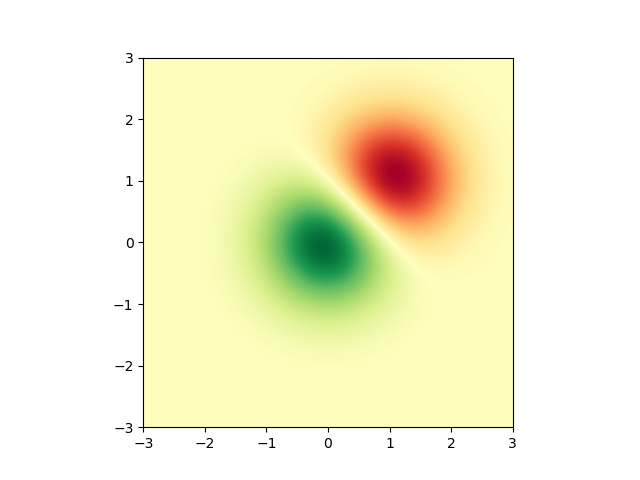

In [95]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn, origin='lower', extent=[-3, 3, -3, 3], vmax=abs(Z).max(), vmin=-abs(Z).max())
plt.show()

<IPython.core.display.Javascript object>


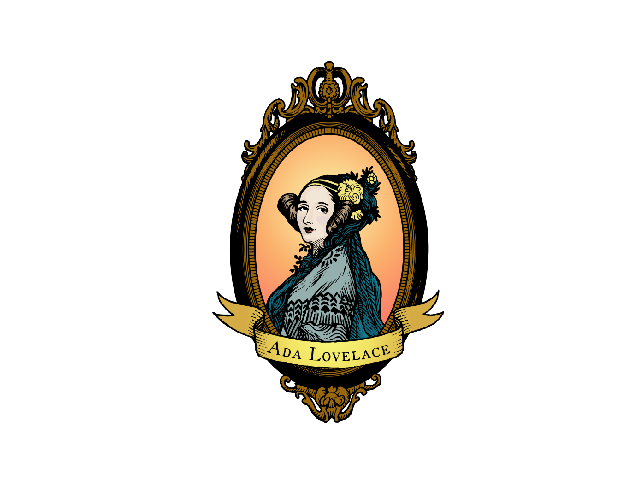

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  del sys.path[0]


<IPython.core.display.Javascript object>


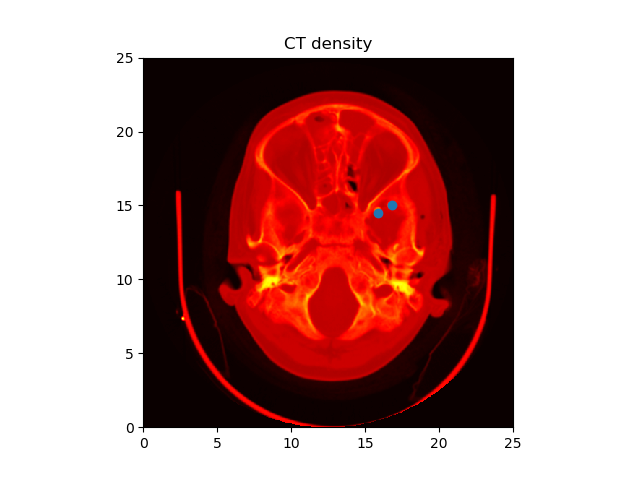

In [96]:
with cbook.get_sample_data('ada.png') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')

w, h = 512, 512

with cbook.get_sample_data('ct.raw.gz', asfileobj=True) as datafile:
    s = datafile.read()

A = np.fromstring(s, np.uint16).astype(float).reshape((w, h))
A /= A.max()

fig, ax = plt.subplots()
extent = (0, 25, 0, 25)
im = ax.imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
ax.plot(x, y, 'o')

ax.set_title('CT density')

plt.show()

### Interpolating images

<IPython.core.display.Javascript object>


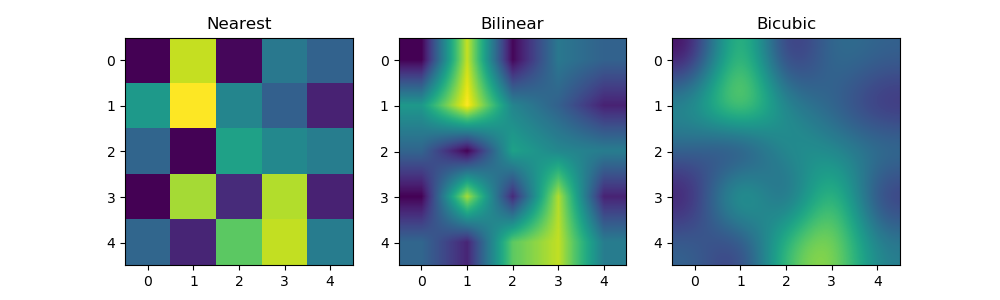

In [97]:
A = np.random.rand(5, 5)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
    ax.imshow(A, interpolation=interp)
    ax.set_title(interp.capitalize())
    ax.grid(False)

plt.show()

<IPython.core.display.Javascript object>


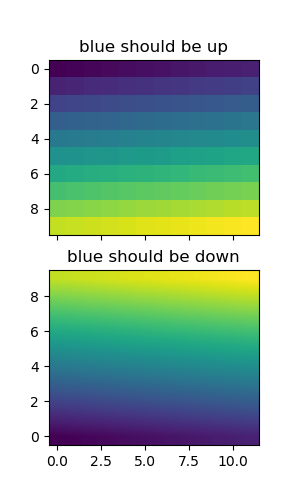

In [98]:
x = np.arange(120).reshape((10, 12))

interp = 'bilinear'
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(3, 5))
axs[0].set_title('blue should be up')
axs[0].imshow(x, origin='upper', interpolation='nearest')

axs[1].set_title('blue should be down')
axs[1].imshow(x, origin='lower', interpolation=interp)
plt.show()

<IPython.core.display.Javascript object>


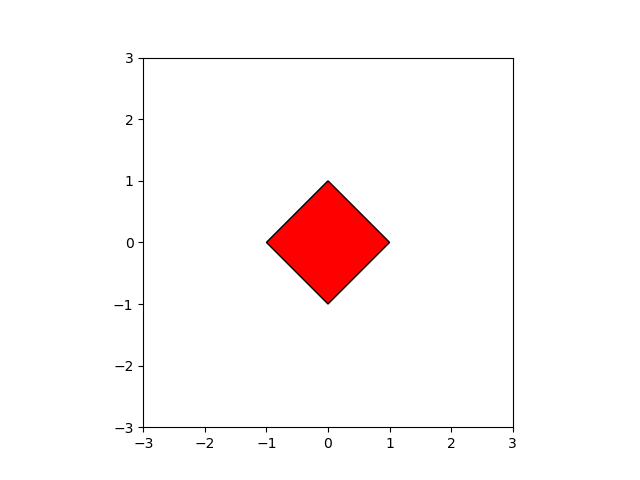

In [99]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X-1)**2 - (Y-1)**2)
Z = (Z1 - Z2) * 2

path = Path([[0, 1], [1, 0], [0, -1], [-1, 0], [0, 1]])
patch = PathPatch(path, facecolor='red')

fig, ax = plt.subplots()
ax.add_patch(patch)

im = ax.imshow(Z, interpolation='bilinear', cmap=cm.gray, origin='lower', extent=[-3, 3, -3, 3], clip_path=patch, clip_on=True)
im.set_clip_path(patch)

plt.show()

## pcolormesh

<IPython.core.display.Javascript object>


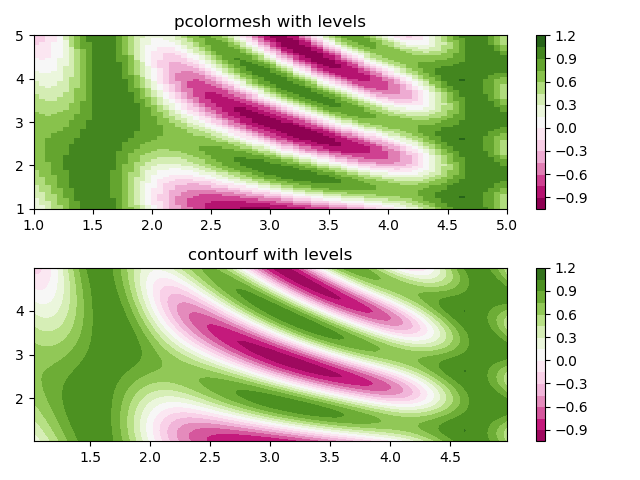

In [100]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

dx, dy = 0.05, 0.05

y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())

cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')

cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels, cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

fig.tight_layout()

plt.show()

## Demo of the histogram function with a few features

<IPython.core.display.Javascript object>


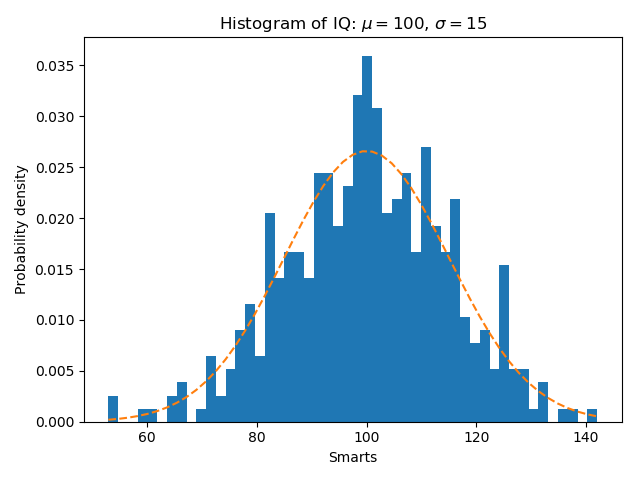

In [101]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

mu = 100
sigma = 15
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density=1)

y = ((1 / (np.sqrt(2 *  np.pi) * sigma)) * 
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

fig.tight_layout()
plt.show()

## PathPatch object

<IPython.core.display.Javascript object>


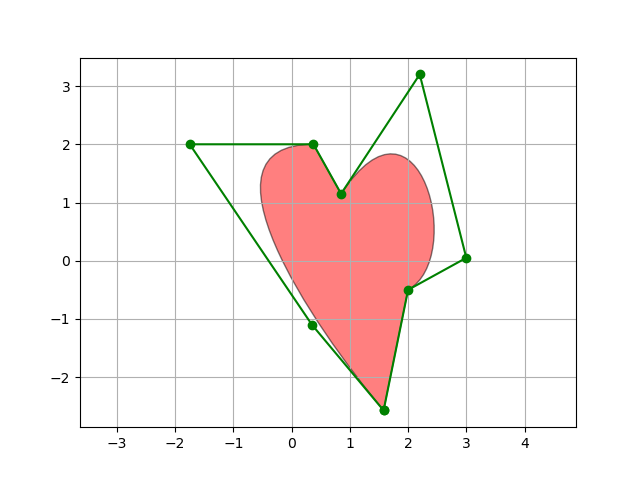

In [102]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

Path = mpath.Path

path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
]

codes, vers = zip(*path_data)
path = mpath.Path(vers, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

## 3D surface (color map)

<IPython.core.display.Javascript object>


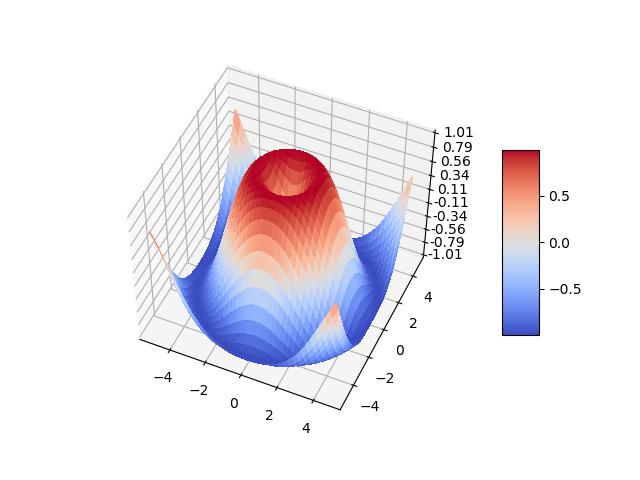

In [103]:
%matplotlib notebook 
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Streamplot

<IPython.core.display.Javascript object>


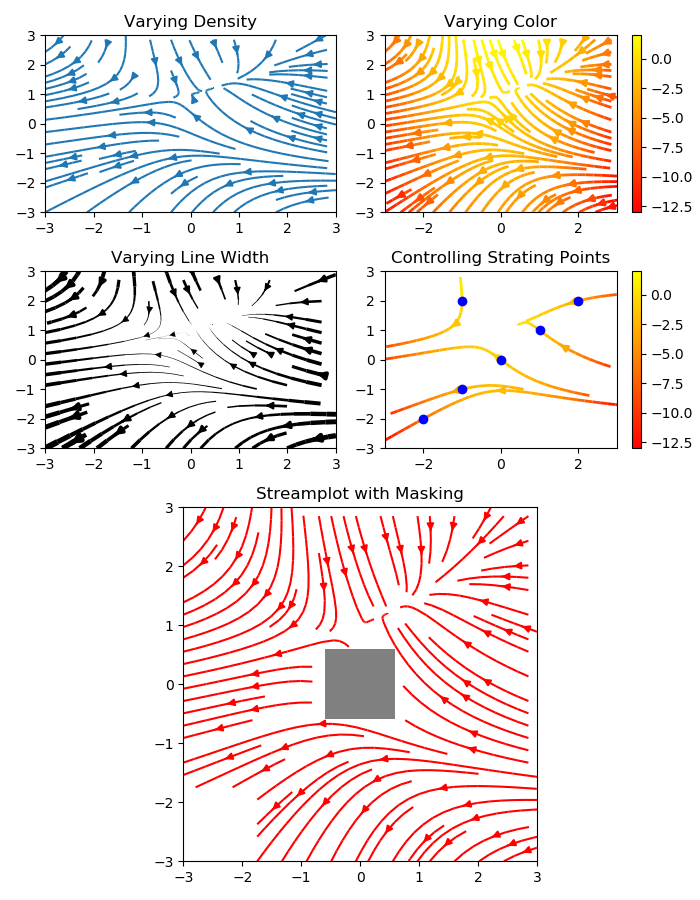

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1, 0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Strating Points')

ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.axis((-w, w, -w, w))

mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5,interpolation='nearest', cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()

## Ellipse Demo

<IPython.core.display.Javascript object>


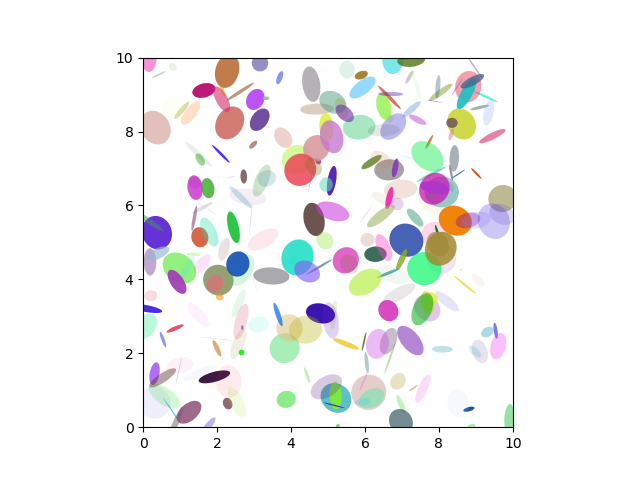

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
       for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))
    
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

## Ellipse Rotaed

<IPython.core.display.Javascript object>


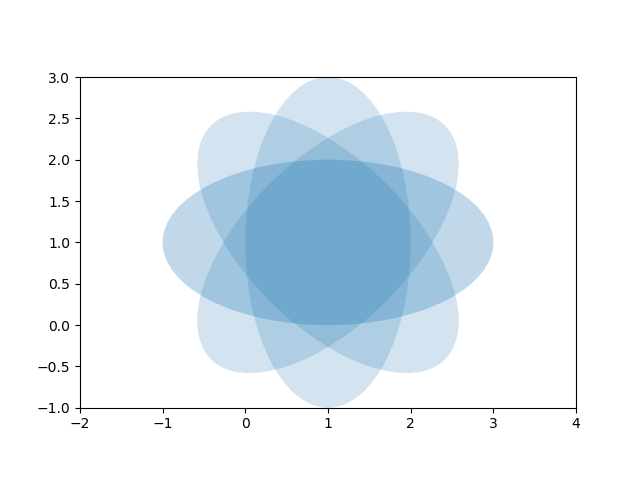

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

delta = 45.0 

angles = np.arange(0, 360 + delta, delta)
ells = [Ellipse((1, 1), 4, 2, a) for a in angles]

a = plt.subplot(111, aspect='equal')

for e in ells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.1)
    a.add_artist(e)
    
plt.xlim(-2, 4)
plt.ylim(-1, 3)

plt.show()

## Barchart Demo

<IPython.core.display.Javascript object>


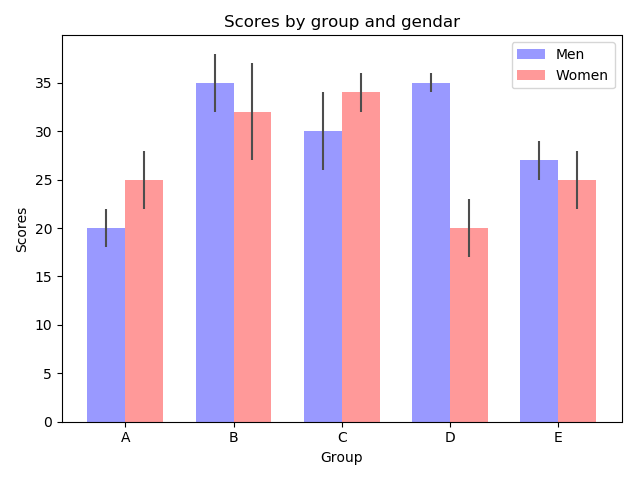

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width, alpha=opacity, color='b',
                yerr=std_men, error_kw=error_config, label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r', yerr=std_women, error_kw=error_config,
                label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gendar')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
ax.legend()

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


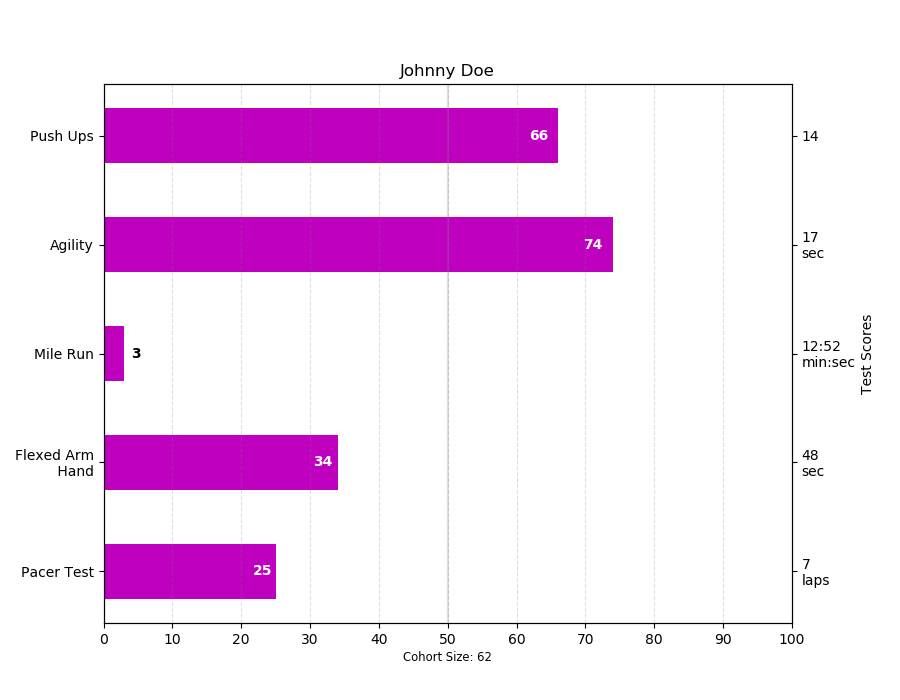

In [108]:
Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

testNames = ['Pacer Test', 'Flexed Arm\n Hand', 'Mile Run', 'Agility', 'Push Ups']
testMeta = dict(zip(testNames, ['laps', 'sec', 'min:sec', 'sec', '']))

def attach_ordinal(num):
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}
    
    v = str(num)
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]

def format_score(scr, test):
    md = testMeta[test]
    if md:
        return '{0}\n{1}'.format(scr, md)
    else:
        return scr
    
def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(testNames):
        return ''
    else:
        return testNames[y]
    
def plot_student_results(student, scores, cohort_size):
    fig, ax1 = plt.subplots(figsize=(9, 7))
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('Eldorado K-8 Fitness Chart')
    
    pos = np.arange(len(testNames))
    
    rects = ax1.barh(pos, [scores[k].percentile for k in testNames],
                     align='center',
                     height=0.5, color='m',
                     tick_label=testNames)
    
    ax1.set_title(student.name)
    
    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    
    ax1.axvline(50, color='grey', alpha=0.25)
    cohort_label = ax1.text(.5, -.07, 'Cohort Size: {0}'.format(cohort_size),
                            horizontalalignment='center', size='small',
                            transform=ax1.transAxes)
    
    ax2 = ax1.twinx()
    
    scoreLabels = [format_score(scores[k].score, k) for k in testNames]
    
    ax2.set_yticks(pos)
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_yticklabels(scoreLabels)
    ax2.set_ylabel('Test Scores')
    
    ax2.set_xlabel(('Percentile Ranking Across''{grade} Grade {gender}s').format(
                     grade=attach_ordinal(student.grade),
                     gender=student.gender.title()))
    
    rect_labels = []
    
    for rect in rects:
        width = int(rect.get_width())
        
        rankStr = int(rect.get_width())
        
        if width < 5:
            xloc = width + 1
            clr = 'black'
            align = 'left'
        
        else:
            xloc = 0.98*width
            clr = 'white'
            align = 'right'
            
        yloc = rect.get_y() + rect.get_height()/2.0
        label = ax1.text(xloc, yloc, rankStr, horizontalalignment=align,verticalalignment='center', color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)
        
    ax2.fmt_ydata = format_ycursor
    
    return {'fig': fig,'ax': ax1,'ax_right': ax2,'bars': rects,'perc_labels': rect_labels,'cohort_label': cohort_label}

student = Student('Johnny Doe', 2, 'boy')
scores  = dict(zip(testNames,(Score(v, p) for v, p in zip(['7', '48', '12:52', '17', '14'],np.round(np.random.uniform(0, 1,len(testNames))*100, 0)))))

cohort_size = 62

arts = plot_student_results(student, scores, cohort_size)
plt.show()

## Pie chart

<IPython.core.display.Javascript object>


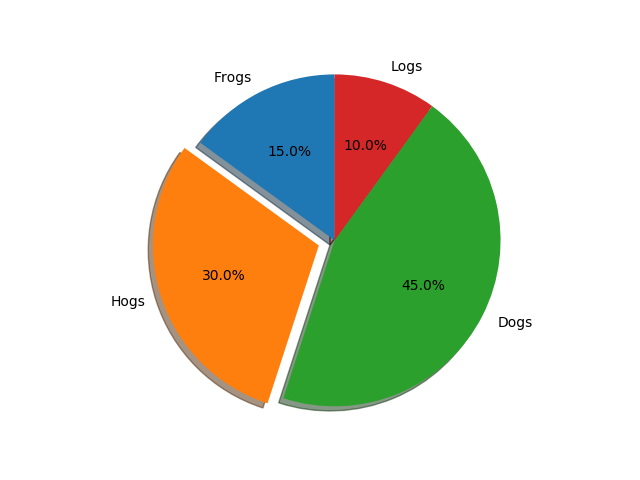

In [109]:
import matplotlib.pyplot as plt

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

## Table Demo

<IPython.core.display.Javascript object>


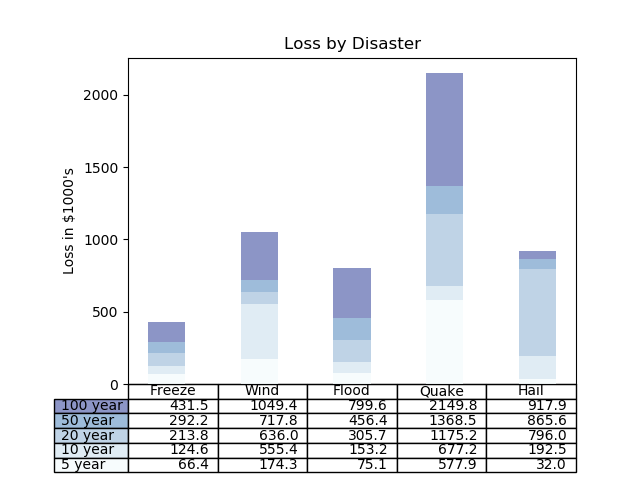

In [110]:
import numpy as np
import matplotlib.pyplot as plt

data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

y_offset = np.zeros(len(columns))

cell_text = []

for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])

colors = colors[::-1]
cell_text.reverse()

the_table = plt.table(cellText=cell_text,
                     rowLabels=rows,
                     rowColours=colors,
                     colLabels=columns,
                     loc='bottom')

plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

## Scatter plots

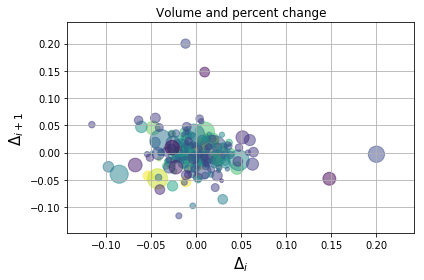

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:] 

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

## GUI widgets
### Slider Demo

<IPython.core.display.Javascript object>


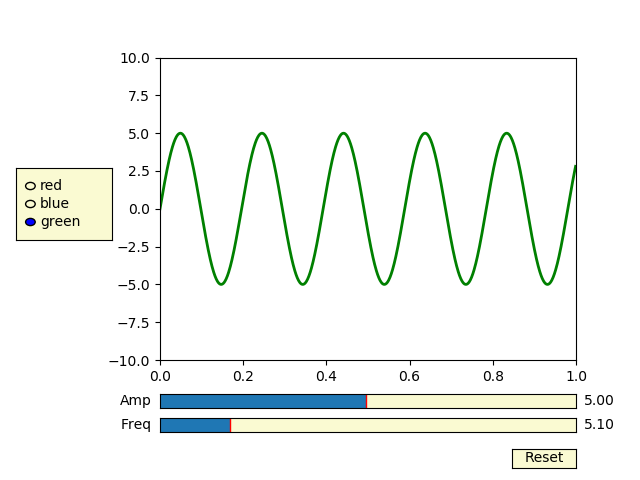

In [117]:
%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)

def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)

def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()


## Filled curves
### Fill plot demo

<IPython.core.display.Javascript object>


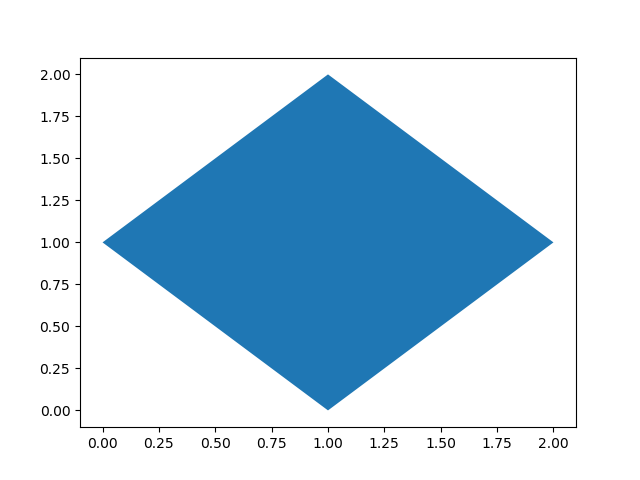

In [118]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 2, 1]
y = [1, 2, 1, 0]

fig, ax = plt.subplots()
ax.fill(x, y)
plt.show()

<IPython.core.display.Javascript object>


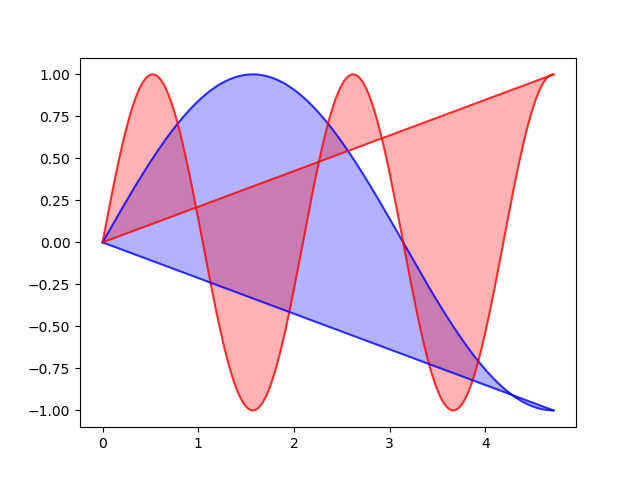

In [127]:
x = np.linspace(0, 1.5 * np.pi, 500)
y1 = np.sin(x)
y2 = np.sin(3*x)

fig, ax = plt.subplots()

ax.fill(x, y1, 'b', x, y2, 'r', alpha=0.3)

ax.plot(x, y1, c='b', alpha=0.8)
ax.plot(x, y2, c='r', alpha=0.8)
ax.plot([x[0], x[-1]], [y1[0], y1[-1]], c='b', alpha=0.8)
ax.plot([x[0], x[-1]], [y2[0], y2[-1]], c='r', alpha=0.8)

## Data handling
### Data tick labels

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [133]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

<IPython.core.display.Javascript object>


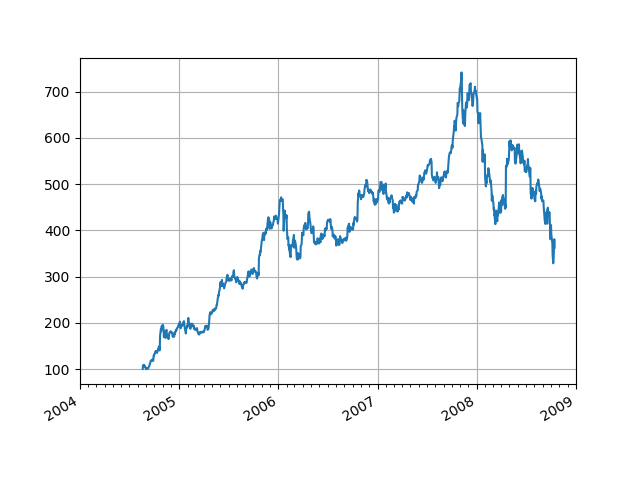

In [140]:
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(r.date[0], 'Y')
datemax = np.datetime64(r.date[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

def price(x):
    return '$%1.2f' % x

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

fig.autofmt_xdate()

plt.show()

## Log plots
### Log Demo

In [142]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t = np.arange(0.01, 20.0, 0.01)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.semilogy(t, np.exp(-t / 5.0))
ax1.set(title='semilogx')
ax1.grid()
